In [40]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
file_path = r"Shopping Mall Customer Segmentation Data .csv"
df = pd.read_csv(file_path)

In [44]:
print("Dataset Info:")
display(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15079 entries, 0 to 15078
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Customer ID     15079 non-null  object
 1   Age             15079 non-null  int64 
 2   Gender          15079 non-null  object
 3   Annual Income   15079 non-null  int64 
 4   Spending Score  15079 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 589.2+ KB


None

In [46]:
print("\nFirst Few Rows of the Dataset:")
display(df.head())


First Few Rows of the Dataset:


,Customer ID,Age,Gender,Annual Income,Spending Score
0,d410ea53-6661-42a9-ad3a-f554b05fd2a7,30,Male,151479,89
1,1770b26f-493f-46b6-837f-4237fb5a314e,58,Female,185088,95
2,e81aa8eb-1767-4b77-87ce-1620dc732c5e,62,Female,70912,76
3,9795712a-ad19-47bf-8886-4f997d6046e3,23,Male,55460,57
4,64139426-2226-4cd6-bf09-91bce4b4db5e,24,Male,153752,76


In [34]:
print("Descriptive Statistics:")
print(df.describe())

Descriptive Statistics:
                Age  Annual Income  Spending Score       Cluster
count  15079.000000   15079.000000    15079.000000  15079.000000
mean      54.191591  109742.880562       50.591617      1.054712
std       21.119207   52249.425866       28.726977      0.832339
min       18.000000   20022.000000        1.000000      0.000000
25%       36.000000   64141.000000       26.000000      0.000000
50%       54.000000  109190.000000       51.000000      1.000000
75%       72.000000  155008.000000       75.000000      2.000000
max       90.000000  199974.000000      100.000000      2.000000


In [48]:
print("\nMissing Values in the Dataset:")
display(df.isnull().sum())


Missing Values in the Dataset:


Customer ID       0
Age               0
Gender            0
Annual Income     0
Spending Score    0
dtype: int64

In [50]:
print("\nDescriptive Statistics of the Dataset:")
display(df.describe())


Descriptive Statistics of the Dataset:


,Age,Annual Income,Spending Score
count,15079.000000,15079.000000,15079.000000
mean,54.191591,109742.880562,50.591617
std,21.119207,52249.425866,28.726977
min,18.000000,20022.000000,1.000000
25%,36.000000,64141.000000,26.000000
50%,54.000000,109190.000000,51.000000
75%,72.000000,155008.000000,75.000000
max,90.000000,199974.000000,100.000000


In [52]:
features = ['Annual Income', 'Spending Score']

In [66]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features])

In [68]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

In [70]:
print("\nCluster Assignments:")
display(df[['Annual Income', 'Spending Score', 'Cluster']].head())


Cluster Assignments:


,Annual Income,Spending Score,Cluster
0,151479,89,2
1,185088,95,2
2,70912,76,1
3,55460,57,1
4,153752,76,2


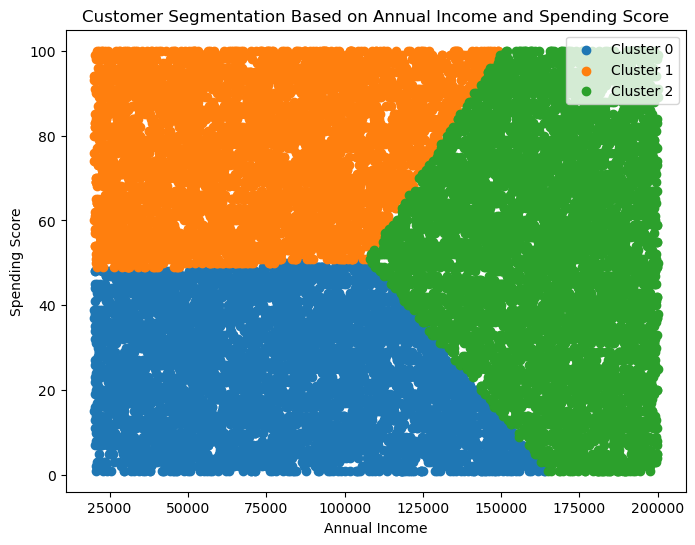

In [72]:
plt.figure(figsize=(8, 6))
for cluster in range(3):
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(
        cluster_data['Annual Income'], 
        cluster_data['Spending Score'], 
        label=f'Cluster {cluster}'
    )

plt.title('Customer Segmentation Based on Annual Income and Spending Score')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

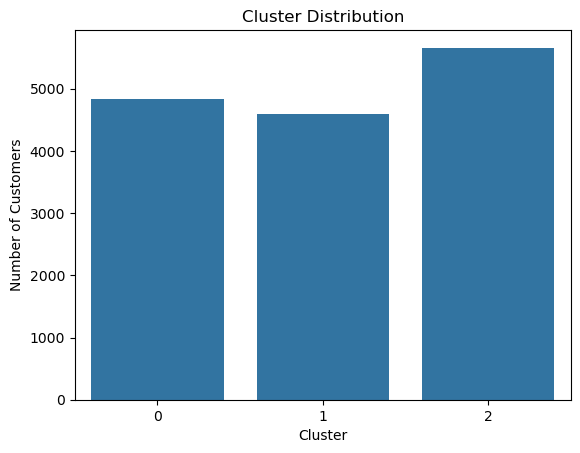


Cluster 0 Insights:


,Age,Annual Income,Spending Score,Cluster
count,4833.000000,4833.000000,4833.000000,4833.0
mean,54.260915,79305.680737,23.366853,0.0
std,21.104488,35697.442686,14.052192,0.0
min,18.000000,20089.000000,1.000000,0.0
25%,36.000000,48723.000000,11.000000,0.0
50%,54.000000,78354.000000,23.000000,0.0
75%,73.000000,106506.000000,35.000000,0.0
max,90.000000,164115.000000,50.000000,0.0



Cluster 1 Insights:


,Age,Annual Income,Spending Score,Cluster
count,4588.000000,4588.000000,4588.000000,4588.0
mean,53.955536,74044.661072,76.594813,1.0
std,21.013024,32481.020411,14.754704,0.0
min,18.000000,20022.000000,49.000000,1.0
25%,36.000000,46113.000000,64.000000,1.0
50%,54.000000,73582.000000,77.000000,1.0
75%,72.000000,99822.000000,90.000000,1.0
max,90.000000,149000.000000,100.000000,1.0



Cluster 2 Insights:


,Age,Annual Income,Spending Score,Cluster
count,5658.000000,5658.000000,5658.000000,5658.0
mean,54.323789,164689.225168,52.761046,2.0
std,21.219572,22087.899753,25.846718,0.0
min,18.000000,108176.000000,1.000000,2.0
25%,36.000000,148413.750000,33.000000,2.0
50%,54.500000,167077.000000,53.000000,2.0
75%,73.000000,183226.000000,73.000000,2.0
max,90.000000,199974.000000,100.000000,2.0


In [74]:
sns.countplot(x='Cluster', data=df)
plt.title('Cluster Distribution')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.show()

# Step 11: Analyze clusters
for cluster in range(3):
    cluster_data = df[df['Cluster'] == cluster]
    print(f"\nCluster {cluster} Insights:")
    display(cluster_data.describe())